In [9]:
!pip install nltk

In [18]:
import nltk

In [22]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Acer\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

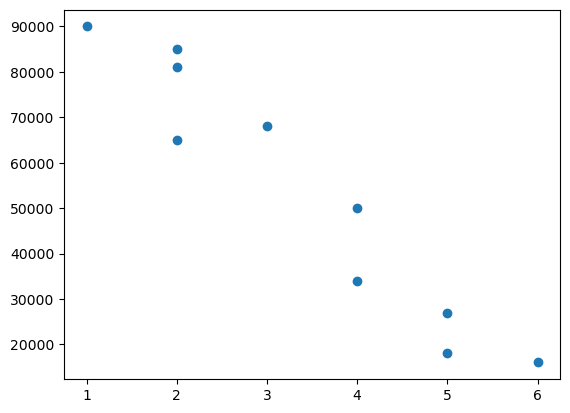

In [35]:
import numpy as np    
import matplotlib.pyplot as plt    
from sklearn.linear_model import LinearRegression 
penjualan = np.array([6,5,5,4,4,3,2,2,2,1])
harga = np.array([16000, 18000, 27000, 34000, 50000, 68000, 65000, 81000, 85000, 90000])

%matplotlib inline
plt.scatter (penjualan, harga)

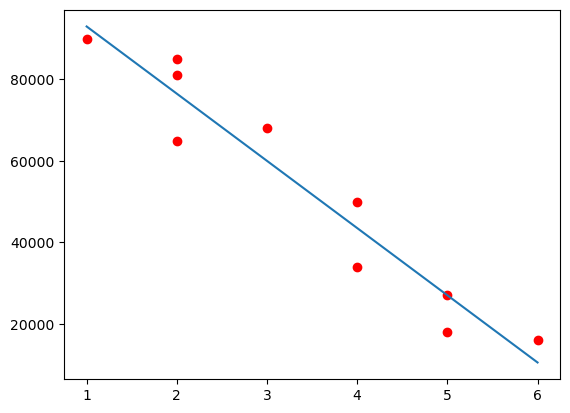

In [39]:
penjualan = penjualan.reshape (-1,1)

linreg = LinearRegression()
linreg.fit(penjualan, harga)

plt.scatter(penjualan, harga, color='red')
plt.plot(penjualan, linreg.predict(penjualan))

In [15]:
df = pd.read_csv('FuelConsumptionCo2.csv')

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [37]:
print(df.columns)



Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


In [39]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
cdf.head(9)


,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


In [51]:
print(cdf.columns)

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS'], dtype='object')


In [5]:
!pip install matplotlib


In [1]:
import matplotlib.pyplot as plt

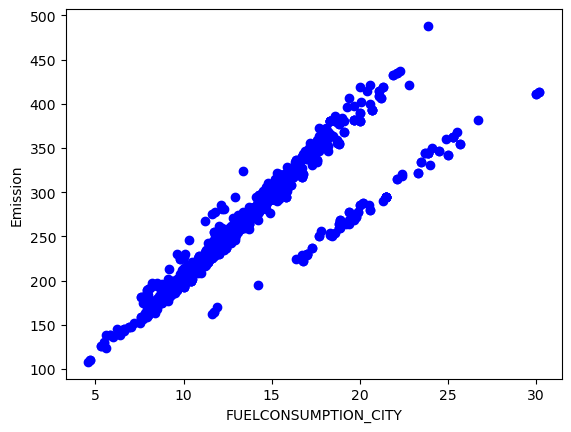

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
cdf = pd.read_csv('FuelConsumptionCo2.csv')  

plt.scatter(cdf.FUELCONSUMPTION_CITY, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("Emission")
plt.show()


In [9]:
print(cdf.columns)


Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')


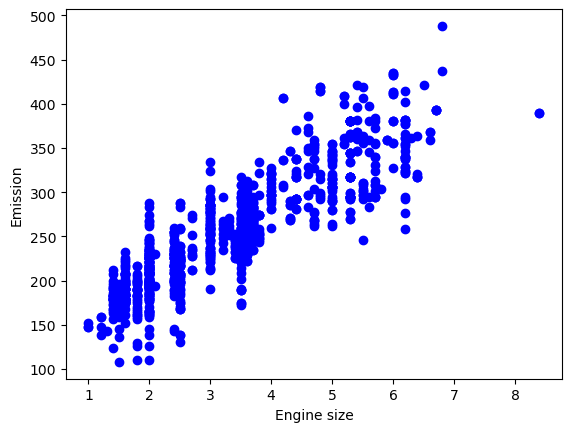

In [11]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()


Melakukan Data Splitting

In [15]:
import numpy as np


In [24]:
import pandas as pd
import numpy as np

df = pd.read_csv('FuelConsumptionCo2.csv')  

msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]

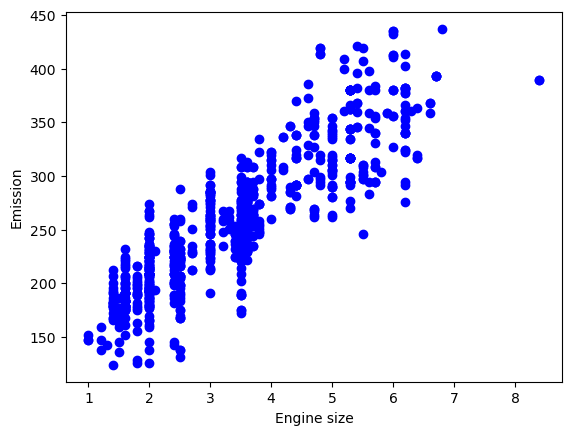

In [26]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

Membuat Model Regresi

In [36]:
from sklearn.linear_model import LinearRegression
import numpy as np

regr = LinearRegression()

train_x = np.asarray(train[['ENGINESIZE']])
train_y = np.asarray(train[['CO2EMISSIONS']])

regr.fit(train_x, train_y)

print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)


Coefficients: [[39.09284537]]
Intercept: [125.150104]


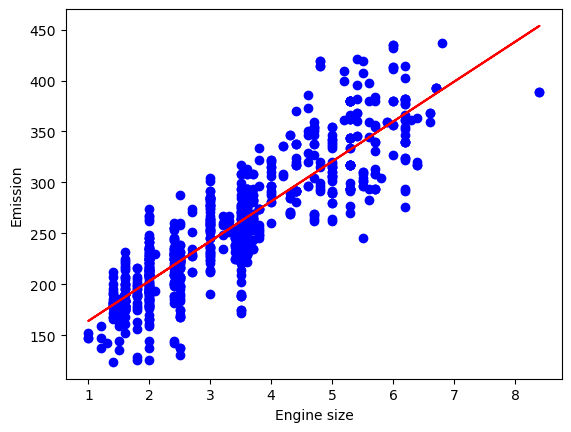

In [42]:
import matplotlib.pyplot as plt

plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')

plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')

plt.xlabel("Engine size")
plt.ylabel("Emission")

plt.show()


In [51]:
from sklearn.metrics import r2_score
import numpy as np


test_x = np.asarray(test[['ENGINESIZE']])
test_y = np.asarray(test[['CO2EMISSIONS']])


test_y_ = regr.predict(test_x)
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score:", r2_score(test_y, test_y_))



Mean absolute error: 24.76
Residual sum of squares (MSE): 1105.74
R2-score: 0.7301750709032395
